In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_meters = pd.read_excel('data/building_data_meters.xlsx')

In [8]:
df_data = pd.read_excel('data/building_data.xlsx')

In [10]:
df_meters.head()

,time,_electricityMeter_1_e_T30M_mv_val,_electricityMeter_1_e_T30M_mv_qual,_electricityMeter_1_e_TM3M_mv_val,_electricityMeter_1_e_TM3M_mv_qual,_electricityMeter_1_p_T30M_mv_val,_electricityMeter_1_p_T30M_mv_qual,_electricityMeter_1_p_TM3M_mv_val,_electricityMeter_1_p_TM3M_mv_qual,_electricityMeter_1_q_T30M_mv_val,...,_electricityMeter_4_e_TM3M_mv_val,_electricityMeter_4_e_TM3M_mv_qual,_electricityMeter_4_p_T30M_mv_val,_electricityMeter_4_p_T30M_mv_qual,_electricityMeter_4_p_TM3M_mv_val,_electricityMeter_4_p_TM3M_mv_qual,_electricityMeter_4_q_T30M_mv_val,_electricityMeter_4_q_T30M_mv_qual,_electricityMeter_4_q_TM3M_mv_val,_electricityMeter_4_q_TM3M_mv_qual
0,2018-04-15 07:00:00,19.712,GOOD PROCESS,NaN,NaN,39.424,GOOD PROCESS,NaN,NaN,12.576,...,NaN,NaN,44.184,GOOD PROCESS,NaN,NaN,2.784,GOOD PROCESS,NaN,NaN
1,2018-04-15 07:39:00,NaN,NaN,1.856,GOOD PROCESS,NaN,NaN,37.12,GOOD PROCESS,NaN,...,2.412,GOOD PROCESS,NaN,NaN,48.24,GOOD PROCESS,NaN,NaN,2.64,GOOD PROCESS
2,2018-07-10 16:30:00,32.816,GOOD PROCESS,NaN,NaN,26.208,GOOD PROCESS,NaN,NaN,2.496,...,NaN,NaN,28.632,GOOD PROCESS,NaN,NaN,2.976,GOOD PROCESS,NaN,NaN
3,2018-07-10 17:00:00,44.320,GOOD PROCESS,NaN,NaN,23.008,GOOD PROCESS,NaN,NaN,2.240,...,NaN,NaN,27.264,GOOD PROCESS,NaN,NaN,3.192,GOOD PROCESS,NaN,NaN
4,2018-07-10 17:30:00,54.656,GOOD PROCESS,NaN,NaN,20.672,GOOD PROCESS,NaN,NaN,1.984,...,NaN,NaN,26.400,GOOD PROCESS,NaN,NaN,3.048,GOOD PROCESS,NaN,NaN


In [11]:
df_meters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317513 entries, 0 to 317512
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   time                                317513 non-null  datetime64[ns]
 1   _electricityMeter_1_e_T30M_mv_val   40087 non-null   float64       
 2   _electricityMeter_1_e_T30M_mv_qual  40087 non-null   object        
 3   _electricityMeter_1_e_TM3M_mv_val   308248 non-null  float64       
 4   _electricityMeter_1_e_TM3M_mv_qual  308248 non-null  object        
 5   _electricityMeter_1_p_T30M_mv_val   40087 non-null   float64       
 6   _electricityMeter_1_p_T30M_mv_qual  40087 non-null   object        
 7   _electricityMeter_1_p_TM3M_mv_val   308248 non-null  float64       
 8   _electricityMeter_1_p_TM3M_mv_qual  308248 non-null  object        
 9   _electricityMeter_1_q_T30M_mv_val   40087 non-null   float64       
 10  _electri

In [38]:
import calendar
import time
from datetime import datetime, timezone,timedelta
import pytz

In [41]:
moscow_tz = pytz.timezone('Europe/Moscow')

In [42]:
def utc_to_local(utc_dt):
    return utc_dt.replace(tzinfo=timezone.utc).astimezone(tz=moscow_tz)

In [49]:
df_meters['time'] = df_meters['time'].apply(utc_to_local)

In [50]:
df_meters['time'].head()

0   2018-04-15 10:00:00+03:00
1   2018-04-15 10:39:00+03:00
2   2018-07-10 19:30:00+03:00
3   2018-07-10 20:00:00+03:00
4   2018-07-10 20:30:00+03:00
Name: time, dtype: datetime64[ns, Europe/Moscow]

In [55]:
mask = (df_meters['time'].dt.hour >= 7) & (df_meters['time'].dt.hour <= 22)

In [56]:
df_met_mask = df_meters[mask]

In [57]:
df_met_mask.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211849 entries, 0 to 317512
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype                        
---  ------                              --------------   -----                        
 0   time                                211849 non-null  datetime64[ns, Europe/Moscow]
 1   _electricityMeter_1_e_T30M_mv_val   26727 non-null   float64                      
 2   _electricityMeter_1_e_T30M_mv_qual  26727 non-null   object                       
 3   _electricityMeter_1_e_TM3M_mv_val   205688 non-null  float64                      
 4   _electricityMeter_1_e_TM3M_mv_qual  205688 non-null  object                       
 5   _electricityMeter_1_p_T30M_mv_val   26727 non-null   float64                      
 6   _electricityMeter_1_p_T30M_mv_qual  26727 non-null   object                       
 7   _electricityMeter_1_p_TM3M_mv_val   205688 non-null  float64                      
 8   _ele

In [58]:
df_data.head()

,time,_Accumulator_Bus_1_e_TM1H_mv_val,_Accumulator_Bus_1_e_TM1H_mv_qual,_Accumulator_Bus_1_p_TM1H_mv_qual,_Accumulator_Bus_1_p_TM1H_mv_val,_Accumulator_Bus_1_phaseA_p_TM1H_mv_val,_Accumulator_Bus_1_phaseA_p_TM1H_mv_qual,_Accumulator_Bus_1_phaseB_p_TM1H_mv_val,_Accumulator_Bus_1_phaseB_p_TM1H_mv_qual,_Accumulator_Bus_1_phaseC_p_TM1H_mv_val,...,_unctrl_load_Bus_3_phaseC_p_TM1H_mv_val,_unctrl_load_Bus_3_phaseC_p_TM1H_mv_qual,_unctrl_load_Bus_4_p_TM1H_mv_val,_unctrl_load_Bus_4_p_TM1H_mv_qual,_unctrl_load_Bus_4_phaseA_p_TM1H_mv_val,_unctrl_load_Bus_4_phaseA_p_TM1H_mv_qual,_unctrl_load_Bus_4_phaseB_p_TM1H_mv_val,_unctrl_load_Bus_4_phaseB_p_TM1H_mv_qual,_unctrl_load_Bus_4_phaseC_p_TM1H_mv_val,_unctrl_load_Bus_4_phaseC_p_TM1H_mv_qual
0,2018-03-16 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-16 14:00:00,NaN,NaN,GOOD MEAN,-0.004168,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-16 15:00:00,NaN,NaN,GOOD MEAN,0.001829,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-16 16:00:00,NaN,NaN,GOOD MEAN,0.002485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-16 17:00:00,NaN,NaN,GOOD MEAN,-0.001558,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21182 entries, 0 to 21181
Columns: 153 entries, time to _unctrl_load_Bus_4_phaseC_p_TM1H_mv_qual
dtypes: datetime64[ns](1), float64(73), object(79)
memory usage: 24.7+ MB


In [60]:
df_data['time'] = df_data['time'].apply(utc_to_local)
mask_2 = (df_data['time'].dt.hour >= 7) & (df_data['time'].dt.hour <= 22)
df_data_mask = df_data[mask_2]

In [63]:
df_data_mask.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14147 entries, 0 to 21181
Columns: 153 entries, time to _unctrl_load_Bus_4_phaseC_p_TM1H_mv_qual
dtypes: datetime64[ns, Europe/Moscow](1), float64(73), object(79)
memory usage: 16.6+ MB


In [65]:
df_met_mask.head()

,time,_electricityMeter_1_e_T30M_mv_val,_electricityMeter_1_e_T30M_mv_qual,_electricityMeter_1_e_TM3M_mv_val,_electricityMeter_1_e_TM3M_mv_qual,_electricityMeter_1_p_T30M_mv_val,_electricityMeter_1_p_T30M_mv_qual,_electricityMeter_1_p_TM3M_mv_val,_electricityMeter_1_p_TM3M_mv_qual,_electricityMeter_1_q_T30M_mv_val,...,_electricityMeter_4_e_TM3M_mv_val,_electricityMeter_4_e_TM3M_mv_qual,_electricityMeter_4_p_T30M_mv_val,_electricityMeter_4_p_T30M_mv_qual,_electricityMeter_4_p_TM3M_mv_val,_electricityMeter_4_p_TM3M_mv_qual,_electricityMeter_4_q_T30M_mv_val,_electricityMeter_4_q_T30M_mv_qual,_electricityMeter_4_q_TM3M_mv_val,_electricityMeter_4_q_TM3M_mv_qual
0,2018-04-15 10:00:00+03:00,19.712,GOOD PROCESS,NaN,NaN,39.424,GOOD PROCESS,NaN,NaN,12.576,...,NaN,NaN,44.184,GOOD PROCESS,NaN,NaN,2.784,GOOD PROCESS,NaN,NaN
1,2018-04-15 10:39:00+03:00,NaN,NaN,1.856,GOOD PROCESS,NaN,NaN,37.12,GOOD PROCESS,NaN,...,2.412,GOOD PROCESS,NaN,NaN,48.24,GOOD PROCESS,NaN,NaN,2.64,GOOD PROCESS
2,2018-07-10 19:30:00+03:00,32.816,GOOD PROCESS,NaN,NaN,26.208,GOOD PROCESS,NaN,NaN,2.496,...,NaN,NaN,28.632,GOOD PROCESS,NaN,NaN,2.976,GOOD PROCESS,NaN,NaN
3,2018-07-10 20:00:00+03:00,44.320,GOOD PROCESS,NaN,NaN,23.008,GOOD PROCESS,NaN,NaN,2.240,...,NaN,NaN,27.264,GOOD PROCESS,NaN,NaN,3.192,GOOD PROCESS,NaN,NaN
4,2018-07-10 20:30:00+03:00,54.656,GOOD PROCESS,NaN,NaN,20.672,GOOD PROCESS,NaN,NaN,1.984,...,NaN,NaN,26.400,GOOD PROCESS,NaN,NaN,3.048,GOOD PROCESS,NaN,NaN


In [69]:
df_data_mask.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14147 entries, 0 to 21181
Columns: 153 entries, time to _unctrl_load_Bus_4_phaseC_p_TM1H_mv_qual
dtypes: datetime64[ns, Europe/Moscow](1), float64(73), object(79)
memory usage: 16.6+ MB


In [71]:
df_data_mask['_Consumers_Bus_1_p_TM1H_mv_qual'].value_counts()

                GOOD MEAN    13826
             INVALID MEAN      142
             GOOD DERIVED       93
Name: _Consumers_Bus_1_p_TM1H_mv_qual, dtype: int64

In [72]:
df_data_mask['_Consumers_Bus_2_p_TM1H_mv_qual'].value_counts()

                GOOD MEAN    13879
             GOOD DERIVED       93
             INVALID MEAN       52
Name: _Consumers_Bus_2_p_TM1H_mv_qual, dtype: int64

In [73]:
df_data_mask['_Consumers_Bus_3_p_TM1H_mv_qual'].value_counts()

                GOOD MEAN    13439
             INVALID MEAN      520
             GOOD DERIVED       92
Name: _Consumers_Bus_3_p_TM1H_mv_qual, dtype: int64

In [74]:
df_data_mask['_Consumers_Bus_4_p_TM1H_mv_qual'].value_counts()

                GOOD MEAN    13616
             INVALID MEAN      304
             GOOD DERIVED       92
          INVALID DERIVED        5
Name: _Consumers_Bus_4_p_TM1H_mv_qual, dtype: int64

In [84]:
print('TM1H_mv_MEAN',df_data_mask['_Consumers_Bus_1_p_TM1H_mv_val'].mean())
print('TM1H_mv_MEDIAN',df_data_mask['_Consumers_Bus_1_p_TM1H_mv_val'].median())
print('TM1H_mv_MIN',df_data_mask['_Consumers_Bus_1_p_TM1H_mv_val'].min())
print('TM1H_mv_MAX',df_data_mask['_Consumers_Bus_1_p_TM1H_mv_val'].max())
print('TM1H_mv_STD',df_data_mask['_Consumers_Bus_1_p_TM1H_mv_val'].std())

TM1H_mv_MEAN 11.046409016286526
TM1H_mv_MEDIAN 19.08675352795257
TM1H_mv_MIN -166398.6484466167
TM1H_mv_MAX 62.40810735270622
TM1H_mv_STD 1403.5219198562074


In [85]:
print('TM2H_mv_MEAN',df_data_mask['_Consumers_Bus_2_p_TM1H_mv_val'].mean())
print('TM2H_mv_MEDIAN',df_data_mask['_Consumers_Bus_2_p_TM1H_mv_val'].median())
print('TM2H_mv_MIN',df_data_mask['_Consumers_Bus_2_p_TM1H_mv_val'].min())
print('TM2H_mv_MAX',df_data_mask['_Consumers_Bus_2_p_TM1H_mv_val'].max())
print('TM2H_mv_STD',df_data_mask['_Consumers_Bus_2_p_TM1H_mv_val'].std())

TM2H_mv_MEAN 23.177616092673862
TM2H_mv_MEDIAN 19.557128539383413
TM2H_mv_MIN 0.0
TM2H_mv_MAX 61.99750408705076
TM2H_mv_STD 11.569408406704108


In [86]:
print('TM3H_mv_MEAN',df_data_mask['_Consumers_Bus_3_p_TM1H_mv_val'].mean())
print('TM3H_mv_MEDIAN',df_data_mask['_Consumers_Bus_3_p_TM1H_mv_val'].median())
print('TM3H_mv_MIN',df_data_mask['_Consumers_Bus_3_p_TM1H_mv_val'].min())
print('TM3H_mv_MAX',df_data_mask['_Consumers_Bus_3_p_TM1H_mv_val'].max())
print('TM3H_mv_STD',df_data_mask['_Consumers_Bus_3_p_TM1H_mv_val'].std())

TM3H_mv_MEAN 16.776993980338002
TM3H_mv_MEDIAN 24.11963833803769
TM3H_mv_MIN -152079.0160299742
TM3H_mv_MAX 59.54736522620286
TM3H_mv_STD 1283.2488545360102


In [87]:
print('TM4H_mv_MEAN',df_data_mask['_Consumers_Bus_4_p_TM1H_mv_val'].mean())
print('TM4H_mv_MEDIAN',df_data_mask['_Consumers_Bus_4_p_TM1H_mv_val'].median())
print('TM4H_mv_MIN',df_data_mask['_Consumers_Bus_4_p_TM1H_mv_val'].min())
print('TM4H_mv_MAX',df_data_mask['_Consumers_Bus_4_p_TM1H_mv_val'].max())
print('TM4H_mv_STD',df_data_mask['_Consumers_Bus_4_p_TM1H_mv_val'].std())

TM4H_mv_MEAN 16.166882958112822
TM4H_mv_MEDIAN 15.19436373672018
TM4H_mv_MIN 0.0
TM4H_mv_MAX 51.38907291319635
TM4H_mv_STD 7.461609584437006


In [89]:
df_data_mask['Target_Sum'] = df_data_mask['_Consumers_Bus_4_p_TM1H_mv_val'] +
                            df_data_mask['_Consumers_Bus_3_p_TM1H_mv_val'] +
                            df_data_mask['_Consumers_Bus_2_p_TM1H_mv_val'] +
                            df_data_mask['_Consumers_Bus_1_p_TM1H_mv_val']

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_data_mask.head()

,time,_Accumulator_Bus_1_e_TM1H_mv_val,_Accumulator_Bus_1_e_TM1H_mv_qual,_Accumulator_Bus_1_p_TM1H_mv_qual,_Accumulator_Bus_1_p_TM1H_mv_val,_Accumulator_Bus_1_phaseA_p_TM1H_mv_val,_Accumulator_Bus_1_phaseA_p_TM1H_mv_qual,_Accumulator_Bus_1_phaseB_p_TM1H_mv_val,_Accumulator_Bus_1_phaseB_p_TM1H_mv_qual,_Accumulator_Bus_1_phaseC_p_TM1H_mv_val,...,_unctrl_load_Bus_3_phaseC_p_TM1H_mv_qual,_unctrl_load_Bus_4_p_TM1H_mv_val,_unctrl_load_Bus_4_p_TM1H_mv_qual,_unctrl_load_Bus_4_phaseA_p_TM1H_mv_val,_unctrl_load_Bus_4_phaseA_p_TM1H_mv_qual,_unctrl_load_Bus_4_phaseB_p_TM1H_mv_val,_unctrl_load_Bus_4_phaseB_p_TM1H_mv_qual,_unctrl_load_Bus_4_phaseC_p_TM1H_mv_val,_unctrl_load_Bus_4_phaseC_p_TM1H_mv_qual,Target_Sum
0,2018-03-16 16:00:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-16 17:00:00+03:00,NaN,NaN,GOOD MEAN,-0.004168,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-16 18:00:00+03:00,NaN,NaN,GOOD MEAN,0.001829,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-16 19:00:00+03:00,NaN,NaN,GOOD MEAN,0.002485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-16 20:00:00+03:00,NaN,NaN,GOOD MEAN,-0.001558,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


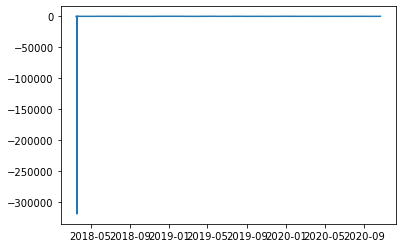

In [99]:
fig = plt.figure()
ax = plt.axes()
df_data_mask['Target_Sum'] = df_data_mask['Target_Sum'].fillna(0)
ax.plot(df_data_mask['time'],df_data_mask['Target_Sum'])

In [106]:
#Значение 71 -318000 - и это портит весь график.
df_data_mask['Target_Sum'][71] = 0.0

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


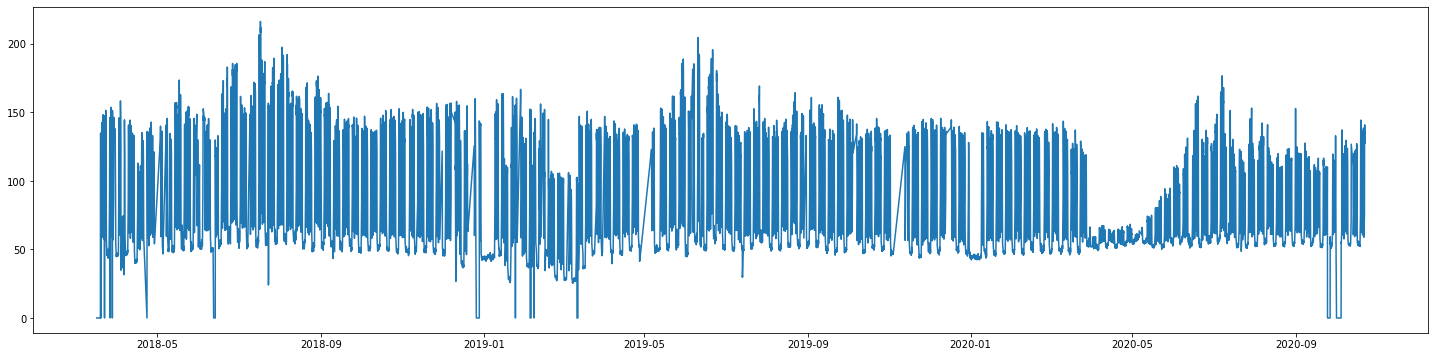

In [112]:
fig = plt.figure(figsize=(25, 6))
ax = plt.axes()
ax.plot(df_data_mask['time'],df_data_mask['Target_Sum'])

In [128]:
df_data_mask['Target_Sum_Complex'] = (df_data_mask['_externalGrid_Bus_1_p_TM1H_mv_val']+
                                      df_data_mask['_externalGrid_Bus_2_p_TM1H_mv_val']+
                                      df_data_mask['_externalGrid_Bus_3_p_TM1H_mv_val']+
                                      df_data_mask['_externalGrid_Bus_4_p_TM1H_mv_val'])- \
                                     (df_data_mask['_roof_1_Bus_4_p_TM1H_mv_val']+
                                      df_data_mask['_roof_2_Bus_4_p_TM1H_mv_val']+
                                      df_data_mask['_roof_Bus_1_p_TM1H_mv_val'])+ \
                                     (df_data_mask['_Accumulator_Bus_1_p_TM1H_mv_val']+
                                      df_data_mask['_Accumulator_Bus_2_p_TM1H_mv_val']+
                                      df_data_mask['_Accumulator_Bus_3_p_TM1H_mv_val'])

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


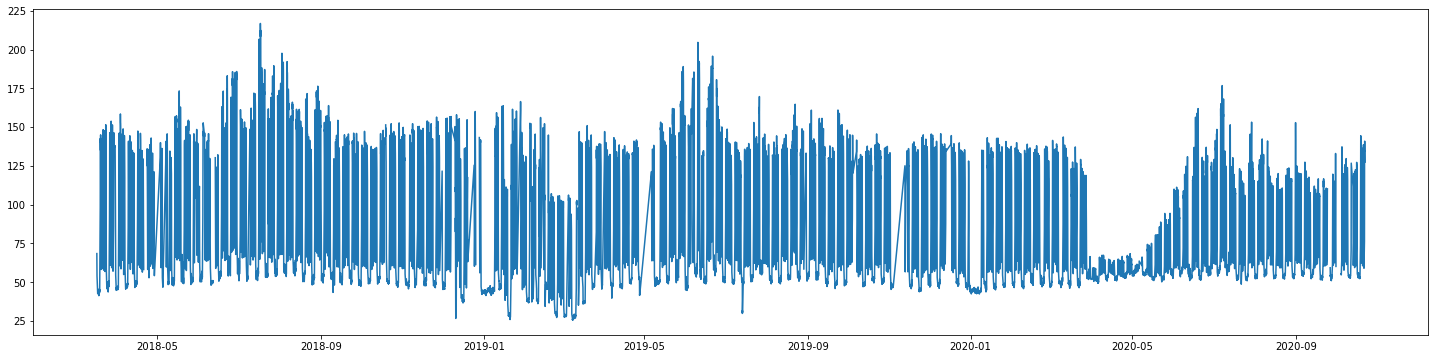

In [129]:
fig = plt.figure(figsize=(25, 6))
ax = plt.axes()
ax.plot(df_data_mask['time'],df_data_mask['Target_Sum_Complex'])

In [130]:
df_data_mask['Target_Sum_Complex_Grid'] = (df_data_mask['_externalGrid_Bus_1_p_TM1H_mv_val']+
                                      df_data_mask['_externalGrid_Bus_2_p_TM1H_mv_val']+
                                      df_data_mask['_externalGrid_Bus_3_p_TM1H_mv_val']+
                                      df_data_mask['_externalGrid_Bus_4_p_TM1H_mv_val'])
df_data_mask['Target_Sum_Complex_Ruf'] = (df_data_mask['_roof_1_Bus_4_p_TM1H_mv_val']+
                                      df_data_mask['_roof_2_Bus_4_p_TM1H_mv_val']+
                                      df_data_mask['_roof_Bus_1_p_TM1H_mv_val'])
df_data_mask['Target_Sum_Complex_Acc'] = (df_data_mask['_Accumulator_Bus_1_p_TM1H_mv_val']+
                                      df_data_mask['_Accumulator_Bus_2_p_TM1H_mv_val']+
                                      df_data_mask['_Accumulator_Bus_3_p_TM1H_mv_val'])

/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/vlad3d/opt/anaconda3/envs/TensorFlow2/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

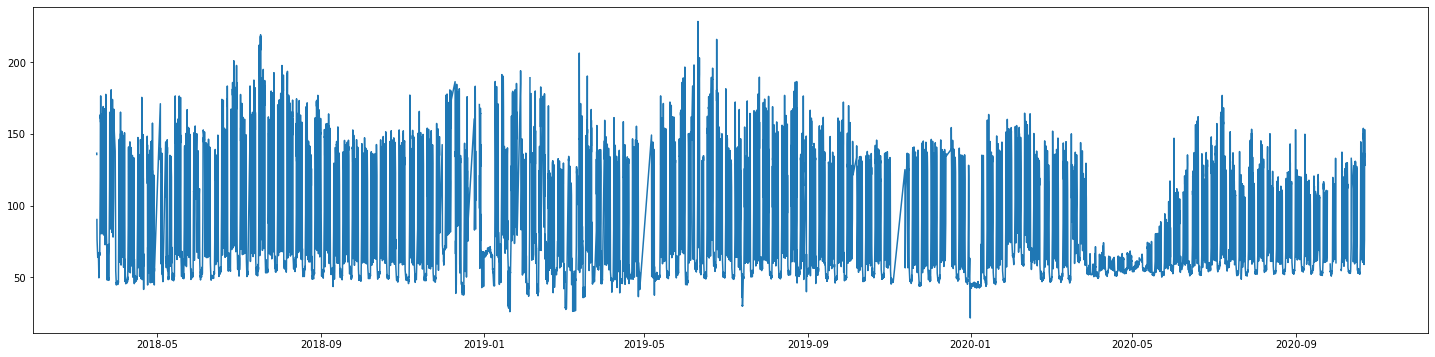

In [133]:
fig = plt.figure(figsize=(25, 6))
ax = plt.axes()
ax.plot(df_data_mask['time'],df_data_mask['Target_Sum_Complex_Grid'])

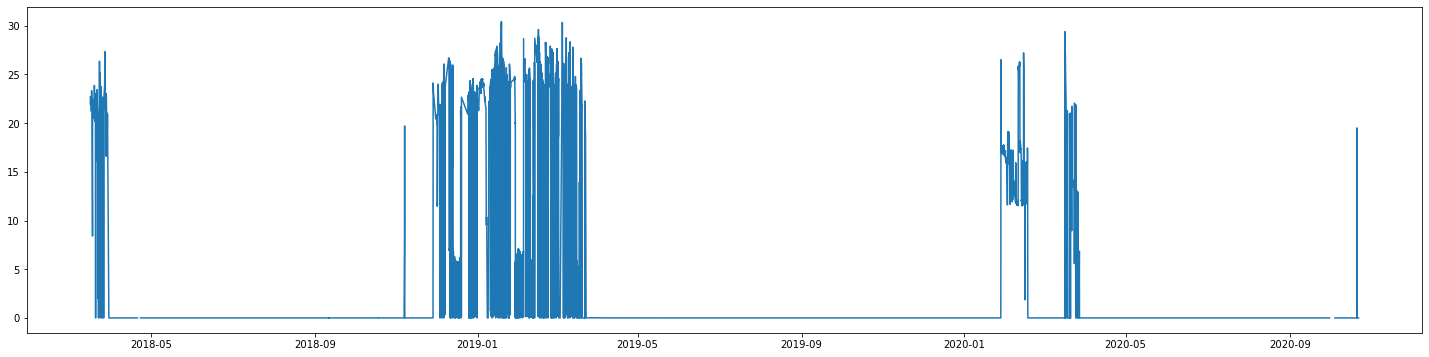

In [134]:
fig = plt.figure(figsize=(25, 6))
ax = plt.axes()
ax.plot(df_data_mask['time'],df_data_mask['Target_Sum_Complex_Ruf'])

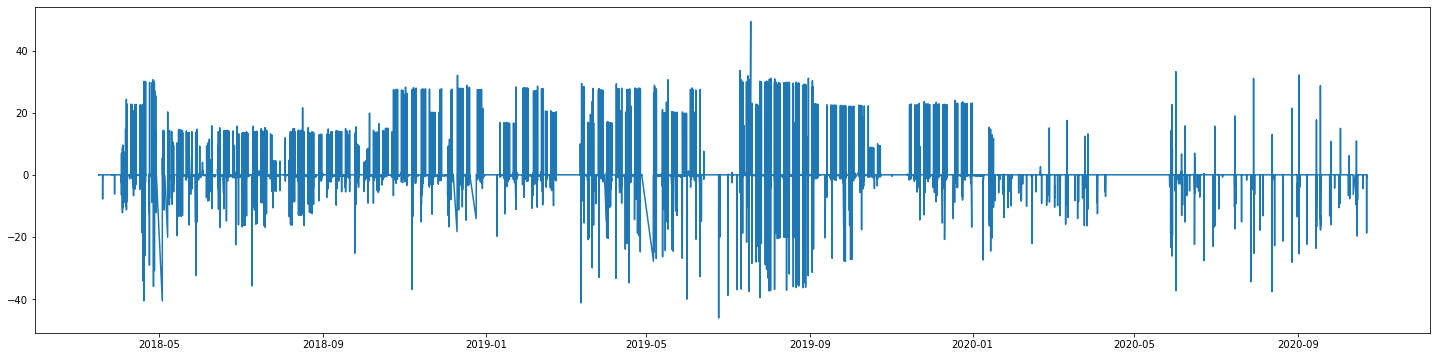

In [135]:
fig = plt.figure(figsize=(25, 6))
ax = plt.axes()
ax.plot(df_data_mask['time'],df_data_mask['Target_Sum_Complex_Acc'])